# CA

**Package scientitstools**

Analyse Factorielle des Correspondances

Ce tutoriel de présenter rapidement les principales fonctionnalités offertes par le package _scientisttools_ pour réaliser une Analyse Factorielle des Correspondances

## Format des données

les données doivent être un tableau de contingence. Nous utiliserons lejeu de données [housetasks](https://rdrr.io/cran/factoextra/man/housetasks.html) disponible dans le package [factoextra](https://cran.r-project.org/web/packages/factoextra/index.html) R.

(https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Données housetasks
from scientisttools import load_housetasks
housetasks = load_housetasks()
housetasks

,Wife,Alternating,Husband,Jointly
rownames,,,,
Laundry,156,14,2,4
Main_meal,124,20,5,4
Dinner,77,11,7,13
Breakfeast,82,36,15,7
Tidying,53,11,1,57
Dishes,32,24,4,53
Shopping,33,23,9,55
Official,12,46,23,15
Driving,10,51,75,3


In [3]:
import plotnine as pn
from scientisttools import get_eigenvalue,get_ca_row,get_ca_col
from scientisttools import fviz_screeplot, fviz_ca

## AFC

In [4]:
from scientisttools import CA
res_ca = CA(n_components=None)
res_ca.fit(housetasks)

CA(n_components=None)

In [5]:
print(get_eigenvalue(res_ca))

       eigenvalue  difference  proportion  cumulative
Dim.1    0.542889    0.097887   48.692221   48.692221
Dim.2    0.445003    0.317954   39.912692   88.604913
Dim.3    0.127048         NaN   11.395087  100.000000


Le graphique des valeurs propres peut être produit à l'aide de la fonction *plot_eigenvalues* ou _fviz_screeplot_

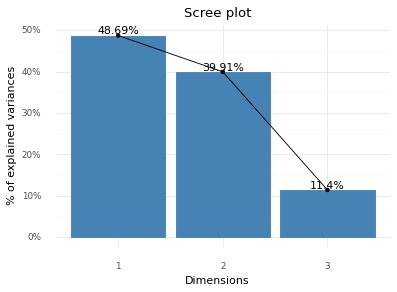

In [6]:
p = fviz_screeplot(res_ca,add_labels=True,choice="proportion")
print(p)

Le point auquel le graphique des valeurs propres montre un virage (appelé "coude") peut être considéré comme indiquant le nombre optimal d'axes principaux à retenir.

Il est également possible de calculer une valeur propre moyenne au - dessus de laquelle l'axe doit être conservé dans le résultat.

---
**_NOTE_**

Nos données contiennent $13$ lignes et $4$ colonnes.

Si les données étaient aléatoires, lavaleur attendue de la valeur propre pour chaque axe serait :


\begin{equation}
\dfrac{1}{I-1} = \dfrac{1}{13-1} = \dfrac{1}{12}=8.33\%
\end{equation}

en termes de lignes.

De même, l'axe moyen devrait représenter 

\begin{equation}
\dfrac{1}{J-1} = \dfrac{1}{4-1} = \dfrac{1}{3}=33.33\%
\end{equation}

en termes de colonnes.

---

Selon

> **_NOTE:_**  Tout axe avec une contribution supérieure au maximum de ces deux pourcentages devrait être considéré comme important et inclus dans la solution pour l'interprétation des données.

Le code **python** ci - dessous, montre le graphique des valeurs propres

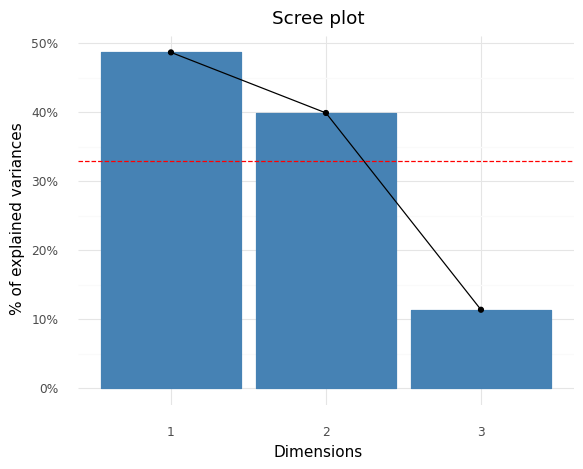

In [7]:
# 
p = fviz_screeplot(res_ca,add_labels=False,choice="proportion")
p = p + pn.geom_hline(yintercept = 0.33,linetype="--",color="red") 
print(p)

## Graphique des points lignes

### Résultats

La fonction *get_ca_row()* est utilisée pour extraire les résultats pour les lignes. Cette fonction renvoie un dictionnaire contenant les coordonnées, les cos2 et les contributions.

In [8]:
# Informations sur les points lignes
row = get_ca_row(res_ca)
print(row.keys())

dict_keys(['coord', 'contrib', 'cos2', 'infos'])


---
Les composantes de la fonction *get_ca_row()* peuvent être utilisés dans le graphique des lignes comme suit:
- *row["coord"]* : coordonnées des lignes
---

### Coordonnées des points lignes

In [9]:
print(row["coord"].head(6))

               Dim.1     Dim.2     Dim.3
Laundry    -0.991837  0.495322 -0.316729
Main_meal  -0.875585  0.490109 -0.164065
Dinner     -0.692574  0.308104 -0.207414
Breakfeast -0.508600  0.452804  0.220405
Tidying    -0.393808 -0.434344 -0.094214
Dishes     -0.188964 -0.441966  0.266949


Utilisez la fonction _fviz_ca()_ pour visualiser

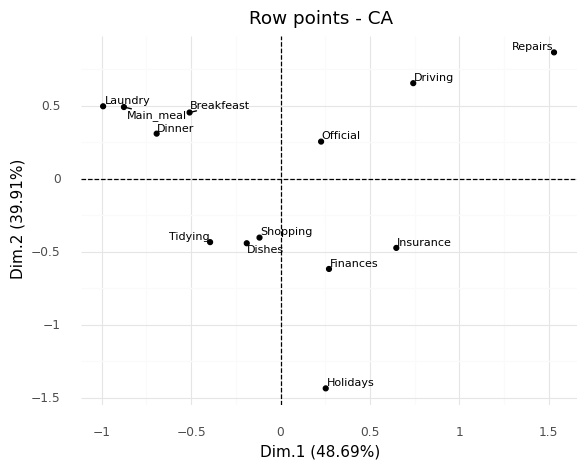

In [10]:
p = fviz_ca(res_ca,choice="row",repel=True)
print(p)

#### Qualité de représentation des lignes

In [11]:
print(row["cos2"].head(6))

               Dim.1     Dim.2     Dim.3
Laundry     0.739987  0.184552  0.075460
Main_meal   0.741603  0.232359  0.026038
Dinner      0.776640  0.153703  0.069657
Breakfeast  0.504943  0.400230  0.094827
Tidying     0.439812  0.535015  0.025172
Dishes      0.118118  0.646153  0.235730


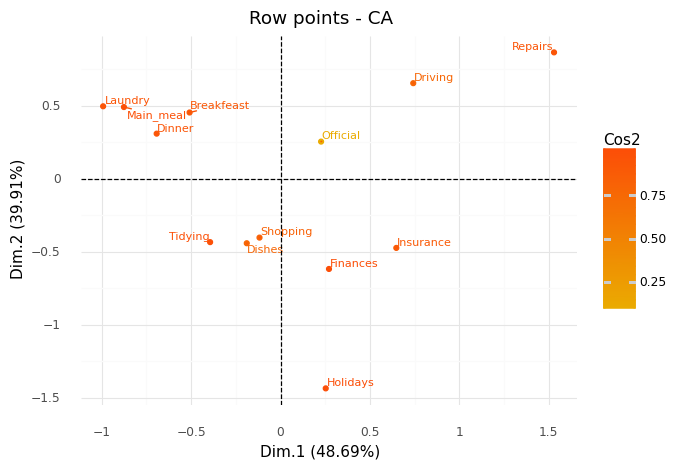

In [12]:
p = fviz_ca(res_ca,choice="row",color="cos2",repel=True)
print(p)

##### Contribution des lignes aux dimensions

In [13]:
print(row["contrib"].head(6))

                Dim.1     Dim.2     Dim.3
Laundry     18.286700  5.563891  7.968424
Main_meal   12.388843  4.735523  1.858689
Dinner       5.471398  1.321022  2.096926
Breakfeast   3.824928  3.698613  3.069399
Tidying      1.998352  2.965644  0.488734
Dishes       0.426166  2.844117  3.634294


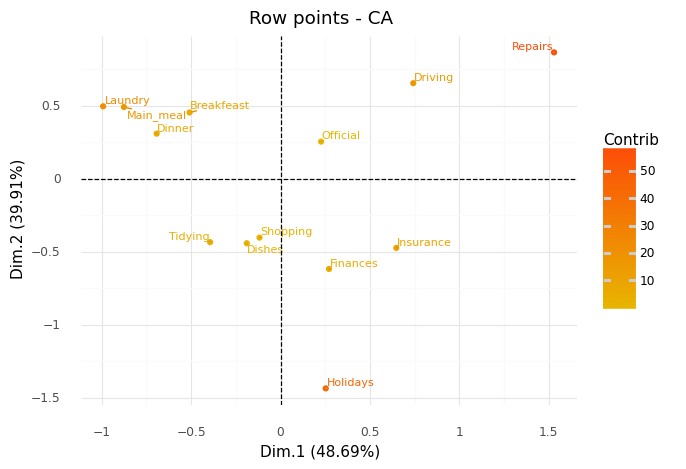

In [14]:
p = fviz_ca(res_ca,choice="row",color="contrib",repel=True)
print(p)

## Graphique des colonnes

### Résultats

In [15]:
col = get_ca_col(res_ca)
col.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos'])

In [16]:
# coord
print(col["coord"])

                Dim.1     Dim.2     Dim.3
Wife        -0.837622  0.365221 -0.199911
Alternating -0.062185  0.291594  0.848589
Husband      1.160918  0.601920 -0.188859
Jointly      0.149426 -1.026579 -0.046443


#### Graphiques : qualité et contribution

In [17]:
from scientisttools import dimdesc
d = dimdesc(res_ca)
d.keys()

dict_keys(['Dim.1', 'Dim.2', 'Dim.3'])

In [18]:
d["Dim.1"]["row"]

,coord
Laundry,-0.991837
Main_meal,-0.875585
Dinner,-0.692574
Breakfeast,-0.508600
Tidying,-0.393808
Dishes,-0.188964
Shopping,-0.117681
Official,0.226632
Holidays,0.252486
Finances,0.270767


In [19]:
d["Dim.1"]["col"]

,coord
Wife,-0.837622
Alternating,-0.062185
Jointly,0.149426
Husband,1.160918
